# Lecture 10: Intro to Google Earth Engine

Intro to GEE Presentation: https://docs.google.com/presentation/d/1hT9q6kWigM1MM3p7IEcvNQlpPvkedW-lgCCrIqbNeis/edit#slide=id.g4e98c855a5_0_4148

Basic concepts within/behind GEE: https://developers.google.com/earth-engine/guides/getstarted?hl=en

#### A list of all the functions within the Google Earth Engine module/API:
Specific instructions about the Application Programming Interface: https://developers.google.com/earth-engine/api_docs

In [2]:
import ee

In [3]:
ee.Initialize()

In [4]:
image = ee.Image('LANDSAT/LC08/C01/T1/LC08_044034_20140318')

In [5]:
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B1',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7801],
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 460785, 0, -30, 4264215]},
  {'id': 'B2',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7801],
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 460785, 0, -30, 4264215]},
  {'id': 'B3',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7801],
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 460785, 0, -30, 4264215]},
  {'id': 'B4',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [7661, 7801],
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 460785, 0, -30, 4264215]},
  {'id': 'B5',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
  

In [16]:
from IPython.display import Image

# Create a URL to the styled image for a region around France.
url = image.select('B2').getThumbUrl({
    'min': 7e3, 'max': 20e3, 'dimensions': 512,# 'region': roi,
    'palette': ['black', 'white']})
print(url)

# Display the thumbnail land surface temperature in France.
print('\nPlease wait while the thumbnail loads, it may take a moment...')
Image(url=url)


https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/065a99fcd69af9c659d53a20bc1d68d2-cdae79c547f9970a80da3571d1855c94:getPixels

Please wait while the thumbnail loads, it may take a moment...


In [9]:
mean_image = image.reduce(ee.Reducer.mean())

In [10]:
mean_image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'mean',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:32610',
   'crs_transform': [30, 0, 460785, 0, -30, 4264215]}],
 'properties': {'system:footprint': {'type': 'LinearRing',
   'coordinates': [[-121.3637119499993, 36.41016684133052],
    [-121.35905784815819, 36.42528989660049],
    [-121.2315833015866, 36.840374852891664],
    [-121.09978718573184, 37.26438246506325],
    [-121.00571062336425, 37.564795515259384],
    [-120.98453376062118, 37.632161601008896],
    [-120.95100979452299, 37.73864548098522],
    [-120.90277241165228, 37.89149086576169],
    [-120.8836409072059, 37.951976016520376],
    [-120.85713152433351, 38.03584247073611],
    [-120.82804345546616, 38.12789513604401],
    [-122.38148159443172, 38.42337450676813],
    [-122.9500220192271, 38.525813632077686],
    [-122.95103687833704, 38.52422133103557],
    [-122.9569591344694, 38.504384836247866],
    [-123.438

In [19]:
# Create a URL to the styled image for a region around France.
url = mean_image.getThumbUrl({
    'min': 7e3, 'max': 20e3, 'dimensions': 512,# 'region': roi,
    'palette': ['black', 'white']})
print(url)

# Display the thumbnail land surface temperature in France.
print('\nPlease wait while the thumbnail loads, it may take a moment...')
Image(url=url)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/068f5c417cf5159cedc62dd8cdc4ef0e-dc73c6d8bd79052291fd29aee011043a:getPixels

Please wait while the thumbnail loads, it may take a moment...


In [ ]:
from IPython.display import Image

# Create a URL to the styled image for a region around France.
url = lst_img.getThumbUrl({
    'min': 10, 'max': 30, 'dimensions': 512, 'region': roi,
    'palette': ['blue', 'yellow', 'orange', 'red']})
print(url)

# Display the thumbnail land surface temperature in France.
print('\nPlease wait while the thumbnail loads, it may take a moment...')
Image(url=url)


## Let's look at a histogram of pixel values

In [21]:
snow =  ee.ImageCollection('MODIS/006/MOD10A1') #500m
global_mean_snowcover = snow.mean().select('NDSI_Snow_Cover')
global_mean_snowcover.getInfo()

{'type': 'Image',
 'bands': [{'id': 'NDSI_Snow_Cover',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 255},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]}]}

In [22]:
moscow_lon = -116.98# -117.00
moscow_lat = 46.75#46.732
mm_lat = 46.81
mm_long = -116.86

moscow_poi = ee.Geometry.Point(moscow_lon, moscow_lat)
mm_poi = ee.Geometry.Point(mm_long, mm_lat)

# Define the operative scale of the dataset.  This is important for defining how EE does its analyses.
#    This should be the resolution of the data product.
scale = 500  # scale in meters



define the buffer around Moscow -> make a geometry, and buffer it (50e3)
define a reducer  ->  ee.Reducer.fixedHistogram
identify the way to apply the reducer to the image, within the buffer -> Image.reduceRegion(reducer, geometry, scale,



In [23]:
moscow_poi.buffer(50e3)

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Geometry.buffer",
    "arguments": {
      "distance": {
        "constantValue": 50000.0
      },
      "geometry": {
        "functionInvocationValue": {
          "functionName": "GeometryConstructors.Point",
          "arguments": {
            "coordinates": {
              "constantValue": [
                -116.98,
                46.75
              ]
            }
          }
        }
      }
    }
  }
})

In [25]:
hist_reducer = ee.Reducer.fixedHistogram(0, 40, 80)

In [38]:
hist_data_ee = global_mean_snowcover.reduceRegion(hist_reducer, 
                                                  moscow_poi.buffer(50e3), 
                                                  scale)

In [39]:
hist_data_ee # <--- This is the last thing that is strictly within the GEE module

### Now....  everything here on out is more fundamental python, matplotlib, numpy

In [40]:
hist_data = hist_data_ee.getInfo()

In [45]:
type(hist_data['NDSI_Snow_Cover'])

list

In [48]:
import numpy as np
hist_np = np.array(hist_data['NDSI_Snow_Cover'])
hist_np

array([[0.00000000e+00, 8.15858824e+02],
       [5.00000000e-01, 3.20664314e+03],
       [1.00000000e+00, 2.61930196e+03],
       [1.50000000e+00, 2.48649412e+03],
       [2.00000000e+00, 2.46041176e+03],
       [2.50000000e+00, 3.20160392e+03],
       [3.00000000e+00, 5.12787843e+03],
       [3.50000000e+00, 5.40258039e+03],
       [4.00000000e+00, 4.90636471e+03],
       [4.50000000e+00, 3.72809020e+03],
       [5.00000000e+00, 2.74174510e+03],
       [5.50000000e+00, 2.07145882e+03],
       [6.00000000e+00, 1.87962353e+03],
       [6.50000000e+00, 1.58141569e+03],
       [7.00000000e+00, 1.25872549e+03],
       [7.50000000e+00, 8.38815686e+02],
       [8.00000000e+00, 5.03352941e+02],
       [8.50000000e+00, 2.77658824e+02],
       [9.00000000e+00, 1.16239216e+02],
       [9.50000000e+00, 6.59411765e+01],
       [1.00000000e+01, 3.19529412e+01],
       [1.05000000e+01, 2.14431373e+01],
       [1.10000000e+01, 2.71411765e+01],
       [1.15000000e+01, 1.60000000e+01],
       [1.200000

In [50]:
bins = hist_np[:, 0]
counts = hist_np[:, 1]

In [51]:
import matplotlib.pyplot as plt

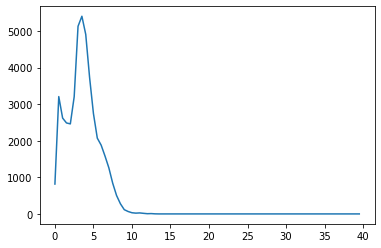

In [52]:
plt.plot(bins, counts)

Text(0, 0.5, 'Proportion of land\nwith mean snow cover')

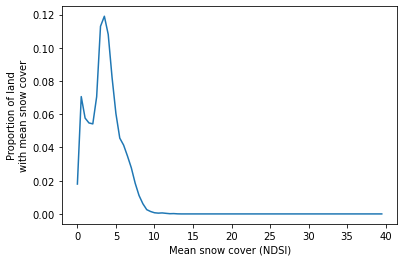

In [57]:
norm_counts = counts / np.sum(counts) # Normalize the counts by the total number of pixels within the buffer

fig, ax = plt.subplots()
ax.plot(bins, norm_counts)
ax.set_xlabel('Mean snow cover (NDSI)')
ax.set_ylabel('Proportion of land\nwith mean snow cover')